Epoch 1/15
718/718 [==============================] - 363s 473ms/step - loss: 1.6615 - accuracy: 0.3630 - val_loss: 2.1506 - val_accuracy: 0.3206
Epoch 2/15
718/718 [==============================] - 385s 537ms/step - loss: 1.4225 - accuracy: 0.4724 - val_loss: 1.7131 - val_accuracy: 0.3990
Epoch 3/15
718/718 [==============================] - 306s 426ms/step - loss: 1.3604 - accuracy: 0.4948 - val_loss: 2.9195 - val_accuracy: 0.3548
Epoch 4/15
718/718 [==============================] - 319s 445ms/step - loss: 1.3983 - accuracy: 0.4673 - val_loss: 2.5065 - val_accuracy: 0.3222
Epoch 5/15
718/718 [==============================] - 230s 321ms/step - loss: 1.3206 - accuracy: 0.4997 - val_loss: 2.0459 - val_accuracy: 0.3187
Epoch 6/15
718/718 [==============================] - 227s 316ms/step - loss: 1.2714 - accuracy: 0.5206 - val_loss: 2.1501 - val_accuracy: 0.4819
Epoch 7/15
718/718 [==============================] - 176s 246ms/step - loss: 1.2774 - accuracy: 0.5194 - val_loss: 2.1294 -

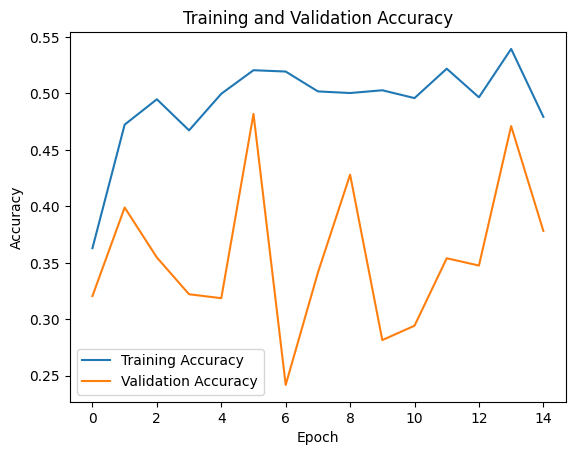

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(directory):
    images = []
    labels = []
    emotion_labels = os.listdir(directory)

    for label, emotion in enumerate(emotion_labels):
        emotion_dir = os.path.join(directory, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the data
root_dir = 'C:\\Users\\chand\\Desktop\\FinalYearProject\\arch'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

X_train, y_train = load_and_preprocess_data(train_dir)
X_test, y_test = load_and_preprocess_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(train_dir))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the MobileNetV2 model
base_model = MobileNetV2(input_shape=(48, 48, 3), include_top=False, weights='imagenet')

model = Sequential()
model.add(Conv2D(3, (1, 1), input_shape=(48, 48, 1)))  # Add 1 channel for grayscale
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train, epochs=15, batch_size=32, validation_data=(X_val.reshape(-1, 48, 48, 1), y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
print(f'Test Accuracy: {test_accuracy}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# MobileNetV2

In [2]:
model.save('mobilenetV2_emotion_detection_model.h5')

print("Model saved successfully.")

Model saved successfully.
